In [9]:
import datetime
import json
import sys
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data Paths

In [24]:
# AES
aes_dir = '../aes/output'
aes_log_file = aes_dir + '/aes.-1.ac.log'
aes_dot_log_file = aes_dir + '/aes.dot.log'
aes_vcd_log_file = aes_dir + '/aes.vcd.log'
aes_fanin_json = aes_dir + '/aes.fanin.json'
aes_reg2reg_json = aes_dir + '/aes.reg2reg.json'

# UART
uart_dir = '../uart/output'
uart_log_file = uart_dir + '/uart.-1.ac.log'
uart_dot_log_file = uart_dir + '/uart.dot.log'
uart_vcd_log_file = uart_dir + '/uart.vcd.log'
uart_fanin_json = uart_dir + '/uart.fanin.json'
uart_reg2reg_json = uart_dir + '/uart.reg2reg.json'

# OR1200
or1200_dir = '../or1200/output'
or1200_log_file = or1200_dir + '/or1200.-1.ac.log'
or1200_dot_log_file = or1200_dir + '/or1200.dot.log'
or1200_vcd_log_file = or1200_dir + '/or1200.vcd.log'
or1200_fanin_json = or1200_dir + '/or1200.fanin.json'
or1200_reg2reg_json = or1200_dir + '/or1200.reg2reg.json'

# PICORV32
picorv32_dir = '../picorv32/output'
picorv32_log_file = picorv32_dir + '/testbench.-1.ac.log'
picorv32_dot_log_file = picorv32_dir + '/testbench.dot.log'
picorv32_vcd_log_file = picorv32_dir + '/testbench.vcd.log'
picorv32_fanin_json = picorv32_dir + '/testbench.fanin.json'
picorv32_reg2reg_json = picorv32_dir + '/testbench.reg2reg.json'

# Load Overall Fan-in/Reg2Reg Data

In [3]:
DESIGN_STR = 'Design'
TYPE_STR = 'Type'
FANIN_STR = 'Fan-in'
REG2REG_STR = 'Reg2Reg Distance'

fanin_data_dict = {
    DESIGN_STR: [],
    TYPE_STR: [],
    FANIN_STR: []
}

reg2reg_data_dict = {
    DESIGN_STR: [],
    TYPE_STR: [],
    REG2REG_STR: []
}

def load_stats(design, log_file):
    avg_fanin = -1
    max_fanin = -1
    avg_reg2reg_path = -1
    max_reg2reg_path = -1
    
    with open(log_file, "r") as f:
        for line in f:
            if "Average Fan-in" in line:
                avg_fanin = float(line.split('=')[-1].lstrip().rstrip())
            if "Max Fan-in" in line:
                max_fanin = int(line.split('=')[-1].lstrip().rstrip())
            if "Average Reg2Reg" in line:
                avg_reg2reg_path = float(line.split('=')[-1].lstrip().rstrip())
            if "Max Reg2Reg" in line:
                max_reg2reg_path = int(line.split('=')[-1].lstrip().rstrip())
    f.close()
    
    fanin_data_dict[DESIGN_STR].append(design)
    fanin_data_dict[DESIGN_STR].append(design)
    fanin_data_dict[TYPE_STR].append('Avg')
    fanin_data_dict[TYPE_STR].append('Max')
    fanin_data_dict[FANIN_STR].append(avg_fanin)
    fanin_data_dict[FANIN_STR].append(max_fanin)
    reg2reg_data_dict[DESIGN_STR].append(design)
    reg2reg_data_dict[DESIGN_STR].append(design)
    reg2reg_data_dict[TYPE_STR].append('Avg')
    reg2reg_data_dict[TYPE_STR].append('Max')
    reg2reg_data_dict[REG2REG_STR].append(avg_reg2reg_path)
    reg2reg_data_dict[REG2REG_STR].append(max_reg2reg_path)

load_stats('AES', aes_log_file)
load_stats('UART', uart_log_file)
load_stats('OR1200', or1200_log_file)
load_stats('RISC-V', picorv32_log_file)

fanin_df = pd.DataFrame(fanin_data_dict)
reg2reg_df = pd.DataFrame(reg2reg_data_dict)

# Load Local Fan-in/Reg2Reg Data

In [4]:
local_fanin_dict = {
    FANIN_STR: [],
    DESIGN_STR: []
}

local_reg2reg_dict = {
    REG2REG_STR: [],
    DESIGN_STR: []
}

# AES
with open(aes_fanin_json, "r") as jf:
    aes_fanin_dict = json.load(jf)
    local_fanin_dict[FANIN_STR].extend(aes_fanin_dict['Fan-in'])
    local_fanin_dict[DESIGN_STR].extend(['AES'] * len(aes_fanin_dict['Fan-in']))
jf.close()
with open(aes_reg2reg_json, "r") as jf:
    aes_reg2reg_dict = json.load(jf)
    local_reg2reg_dict[REG2REG_STR].extend(aes_reg2reg_dict['Reg2Reg Path Length'])
    local_reg2reg_dict[DESIGN_STR].extend(['AES'] * len(aes_reg2reg_dict['Reg2Reg Path Length']))
jf.close()

# UART
with open(uart_fanin_json, "r") as jf:
    uart_fanin_dict = json.load(jf)
    local_fanin_dict[FANIN_STR].extend(uart_fanin_dict['Fan-in'])
    local_fanin_dict[DESIGN_STR].extend(['UART'] * len(uart_fanin_dict['Fan-in']))
jf.close()
with open(uart_reg2reg_json, "r") as jf:
    uart_reg2reg_dict = json.load(jf)
    local_reg2reg_dict[REG2REG_STR].extend(uart_reg2reg_dict['Reg2Reg Path Length'])
    local_reg2reg_dict[DESIGN_STR].extend(['UART'] * len(uart_reg2reg_dict['Reg2Reg Path Length']))
jf.close()

# OR1200
with open(or1200_fanin_json, "r") as jf:
    or1200_fanin_dict = json.load(jf)
    local_fanin_dict[FANIN_STR].extend(or1200_fanin_dict['Fan-in'])
    local_fanin_dict[DESIGN_STR].extend(['OR1200'] * len(or1200_fanin_dict['Fan-in']))
jf.close()
with open(or1200_reg2reg_json, "r") as jf:
    or1200_reg2reg_dict = json.load(jf)
    local_reg2reg_dict[REG2REG_STR].extend(or1200_reg2reg_dict['Reg2Reg Path Length'])
    local_reg2reg_dict[DESIGN_STR].extend(['OR1200'] * len(or1200_reg2reg_dict['Reg2Reg Path Length']))
jf.close()

# RISC-V
with open(picorv32_fanin_json, "r") as jf:
    picorv32_fanin_dict = json.load(jf)
    local_fanin_dict[FANIN_STR].extend(picorv32_fanin_dict['Fan-in'])
    local_fanin_dict[DESIGN_STR].extend(['RISC-V'] * len(picorv32_fanin_dict['Fan-in']))
jf.close()
with open(picorv32_reg2reg_json, "r") as jf:
    picorv32_reg2reg_dict = json.load(jf)
    local_reg2reg_dict[REG2REG_STR].extend(picorv32_reg2reg_dict['Reg2Reg Path Length'])
    local_reg2reg_dict[DESIGN_STR].extend(['RISC-V'] * len(picorv32_reg2reg_dict['Reg2Reg Path Length']))
jf.close()

local_fanin_df = pd.DataFrame(local_fanin_dict)
local_reg2reg_df = pd.DataFrame(local_reg2reg_dict)

# Load Run-time Data

In [25]:
SIM_RUNTIME_STR = 'Simulation (s)'
SSCCLASS_RUNTIME_STR = 'SSC Classification (s)'
SSCENUM_RUNTIME_STR = 'SSC Enumeration (s)'
DFGGEN_RUNTIME_STR = 'DFG Generation (s)'
TOTAL_RUNTIME_STR = 'Total (s)'
SIZE_STR = 'Num. Regs'

runtime_data_dict = {
    DESIGN_STR: [],
    DFGGEN_RUNTIME_STR: [],
    SIM_RUNTIME_STR: [],
    SSCENUM_RUNTIME_STR: [],
    SSCCLASS_RUNTIME_STR: [],
    TOTAL_RUNTIME_STR: [],
    SIZE_STR: []
}

def convert_time_str_2_seconds(t_str):
    (seconds, frac_seconds) = t_str.split('.')
    x = time.strptime(seconds.split('.')[0], '%H:%M:%S')
    x = datetime.timedelta(hours=x.tm_hour,minutes=x.tm_min,seconds=x.tm_sec).total_seconds()
    x += (float(frac_seconds) / 100.0)
    return x

def load_runtimes(design, log_file, dot_log_file, vcd_log_file):
    runtime_data_dict[DESIGN_STR].append(design)
    
    # IVL Stats
    with open(vcd_log_file, "r") as f:
        for line in f:
            if "real" in line:
                (seconds, frac_seconds) = line.split()[-1].rstrip().split('.')
                frac_seconds = float(frac_seconds.rstrip('s')) / 1000.0
                t = time.strptime(seconds, '%Mm%S')
                t = datetime.timedelta(hours=t.tm_hour,minutes=t.tm_min,seconds=t.tm_sec).total_seconds()
                sim_runtime = t + frac_seconds
                runtime_data_dict[SIM_RUNTIME_STR].append(sim_runtime)
    f.close()
    
    # DFG Stats
    with open(dot_log_file, "r") as f:
        for line in f:
            if "real" in line:
                (seconds, frac_seconds) = line.split()[-1].rstrip().split('.')
                frac_seconds = float(frac_seconds.rstrip('s')) / 1000.0
                t = time.strptime(seconds, '%Mm%S')
                t = datetime.timedelta(hours=t.tm_hour,minutes=t.tm_min,seconds=t.tm_sec).total_seconds()
                dfg_runtime = t + frac_seconds
                runtime_data_dict[DFGGEN_RUNTIME_STR].append(dfg_runtime)
    f.close()
    
    # Python Script Stats
    with open(log_file, "r") as f:
        for line in f:
            if "Num. Total FFs/Inputs:" in line:
                num_regs = int(line.split()[-1].rstrip())
                runtime_data_dict[SIZE_STR].append(num_regs)
            if "Identifying Coalesced Counter Candidates..." in line:
                for _ in range(5):
                    line = f.next()
                ct_enum = convert_time_str_2_seconds(line.split()[-1].rstrip())
                for _ in range(7):
                    line = f.next()
                dt_enum = convert_time_str_2_seconds(line.split()[-1].rstrip())
                total_enum = ct_enum + dt_enum
                runtime_data_dict[SSCENUM_RUNTIME_STR].append(total_enum)
            if "Finding malicious coalesced signals..." in line:
                while "Execution Time:" not in line:
                    line = f.next()
                ct_class = convert_time_str_2_seconds(line.split()[-1].rstrip())
                while "Execution Time:" not in line:
                    line = f.next()
                dt_class = convert_time_str_2_seconds(line.split()[-1].rstrip())
                total_class = ct_class + dt_class
                runtime_data_dict[SSCCLASS_RUNTIME_STR].append(total_class)
            if "Analysis complete." in line:
                line = f.next()
                line = f.next()
                t = convert_time_str_2_seconds(line.split()[-1].rstrip())
                runtime_data_dict[TOTAL_RUNTIME_STR].append(dfg_runtime + total_enum + total_class)
                break
    f.close()

load_runtimes('AES', aes_log_file, aes_dot_log_file, aes_vcd_log_file)
load_runtimes('UART', uart_log_file, uart_dot_log_file, uart_vcd_log_file)
load_runtimes('OR1200', or1200_log_file, or1200_dot_log_file, or1200_vcd_log_file)
load_runtimes('RISC-V', picorv32_log_file, picorv32_dot_log_file, picorv32_vcd_log_file)
runtime_df = pd.DataFrame(runtime_data_dict)
print runtime_df

   DFG Generation (s)  Design  Num. Regs  SSC Classification (s)  \
0               5.017     AES       2440                    0.20   
1               0.412    UART        340                    3.90   
2              14.290  OR1200        814                    1.28   
3               0.340  RISC-V        317                    1.00   

   SSC Enumeration (s)  Simulation (s)  Total (s)  
0                 0.24           3.658      5.457  
1                 0.60           3.972      4.912  
2                 7.00          27.602     22.570  
3                 8.85           5.637     10.190  


# Plot Settings

In [6]:
# Set Color Scheme
sns.set()

# Remove Outliers
local_fanin_df[FANIN_STR] = np.where(local_fanin_df[FANIN_STR] > 50, 50, local_fanin_df[FANIN_STR])

# outliers = local_fanin_df[FANIN_STR] > 50
# # print (local_fanin_df[FANIN_STR] == 42)
# print local_fanin_df[outliers]
# local_fanin_df[outliers][FANIN_STR] = np.nan
# local_fanin_df[FANIN_STR].fillna(42, inplace=True)
# print local_fanin_df[local_fanin_df[FANIN_STR] == 42]

# Plot Fan-in & Reg2Reg Path

NameError: name 'RUNTIME_STR' is not defined

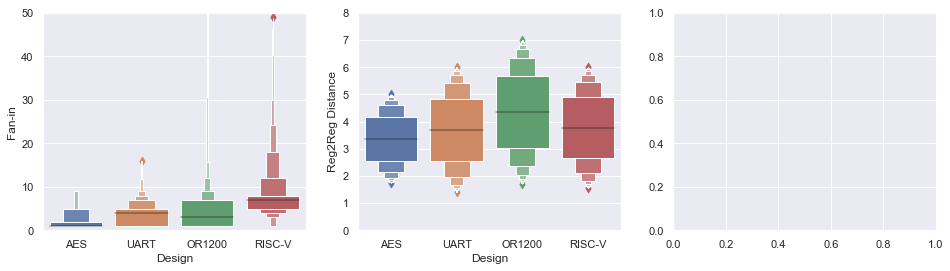

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 4))
sns.boxenplot(x=DESIGN_STR, y=FANIN_STR, data=local_fanin_df, linewidth=2.5, ax=ax1)
ax1.set_ylim([0,50])
sns.boxenplot(x=DESIGN_STR, y=REG2REG_STR, data=reg2reg_df, linewidth=2.5, ax=ax2)
ax2.set_ylim([0,8])
sns.barplot(x=DESIGN_STR, y=RUNTIME_STR, data=runtime_df, ax=ax3)